<a href="https://colab.research.google.com/github/rishabh1125/route_optimization/blob/main/route_opt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mpu # to calculate distance between latitudes and longitudes

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import mpu

In [ ]:
segments = pd.read_csv('pgh_segments.csv')
segments.head()

,from.x,from.y,to.x,to.y
0,-79.866635,40.452687,-79.866439,40.452785
1,-79.867666,40.452143,-79.866635,40.452687
2,-79.867638,40.451004,-79.866897,40.450547
3,-79.867328,40.450173,-79.866971,40.450184
4,-79.867624,40.449684,-79.867066,40.449859


In [ ]:
rows = segments.shape[0]

In [ ]:
#add edges 
edges = []
for i in range(rows):
  edges.append(((segments['from.x'][i],segments['from.y'][i]),(segments['to.x'][i],segments['to.y'][i])))
len(edges)

22581

In [ ]:
# implement the graph
G=nx.Graph()
G.add_edges_from(edges)

In [ ]:
nodes = list(G)
G.degree[nodes[0]]

3

Building model to predict speed

In [ ]:
df = pd.read_csv('pgh_train.csv')
df.head()

,from.x,from.y,to.x,to.y,speed,time,is.weekday
0,-80.010193,40.439438,-80.009608,40.439757,27.603437,8,1
1,-79.975452,40.435881,-79.966978,40.435817,53.779673,8,1
2,-79.926506,40.427954,-79.911553,40.425766,39.520281,8,1
3,-80.010193,40.439438,-80.000976,40.436302,24.878792,8,1
4,-80.007891,40.448433,-80.004527,40.449137,41.973019,8,1


In [ ]:
list(df.columns)

['from.x', 'from.y', 'to.x', 'to.y', 'speed', 'time', 'is.weekday']

In [ ]:
import tensorflow as tf 

In [ ]:
train = df.drop('speed',axis=1)
target = df['speed']

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=4),
  tf.keras.layers.Dense(units=4),
  tf.keras.layers.Dense(units=1)
])

In [ ]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

In [ ]:
history = model.fit(train,target, epochs=100, verbose=False)

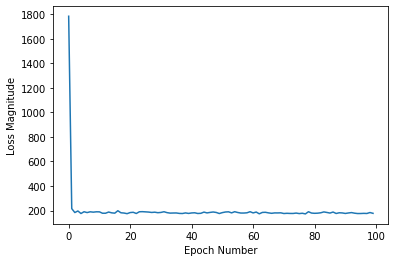

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [ ]:
train.iloc[[4]]

,from.x,from.y,to.x,to.y,time,is.weekday
4,-80.007891,40.448433,-80.004527,40.449137,8,1


In [ ]:
print(model.predict([[-79.926506	,40.427954,	-79.911553,	40.425766,14,1]]))

[[29.56261]]


Calculate Fastest route using Dijkshtra's algorithm

In [ ]:
from datetime import datetime
hour = datetime.now().hour
weekday =  datetime(2021, 5, 8).weekday()
weekend =0
if weekday>4: weekend =1
print(weekend) 

1


In [ ]:
def dist(n1,n2,E):
  return mpu.haversine_distance(n1,n2)/model.predict([[n1[0],n1[1],n2[0],n2[1],hour,weekend]])*60
time, path = nx.bidirectional_dijkstra(G,edges[23][0],edges[35][1], dist)


In [ ]:
print("ETA: {} min".format(time[0][0]*1.5))
print(path)

ETA: 5.450269460678101 min
[(-79.86927042834371, 40.4508391470073), (-79.8694156700555, 40.4507143822491), (-79.8697824060545, 40.450389403239704), (-79.87015846856991, 40.450046833144796), (-79.870574992943, 40.449662333585295), (-79.87092367428329, 40.44935803656779), (-79.87298832775559, 40.4510841060646), (-79.8736253374338, 40.45249437772721), (-79.8740922715889, 40.4499870466816), (-79.8748643367008, 40.450877762828895), (-79.8745356878646, 40.4515696504904), (-79.87621318387029, 40.4515933757632), (-79.8765837840395, 40.451292072478104), (-79.87713742944409, 40.4512959565765), (-79.8771418187466, 40.451862537514295), (-79.8764214006341, 40.4524546402556), (-79.87600079320191, 40.4527661296776), (-79.8759332750866, 40.455014454011796), (-79.8758986801527, 40.4560693858314), (-79.8758838576191, 40.4565399604965), (-79.875868642735, 40.457112135244), (-79.8757773452731, 40.457594155285), (-79.8758783636986, 40.4581475464343), (-79.8752086310162, 40.4586537594135), (-79.874998370739

Visualize the route

In [ ]:
import numpy as np
import pylab as pl
from matplotlib import collections  as mc

blue = (0, 0, 1, 1)
red = (1, 0, 0, 1)
gray = (0,0,0,0.3)
light = (0,0,0,0.1)

In [ ]:
roads = []
c = []
min_X,max_X,min_Y,max_Y = -0,-100,100,0
for i in range(len(path)-1):
  roads.append((path[i],path[i+1]))
  min_X = min(path[i][0],min_X)
  min_Y = min(path[i][1],min_Y)
  max_X = max(path[i][0],max_X)
  max_Y = max(path[i][1],max_Y)
  c.append(red)

for edge in edges:
  if (min_X<=edge[0][0]<=max_X and min_Y<=edge[0][1]<=max_Y) or (min_X<=edge[1][0]<=max_X and  min_Y<=edge[0][1]<=max_Y):  
    if edge not in roads:
      roads.append(edge)
      c.append(gray)


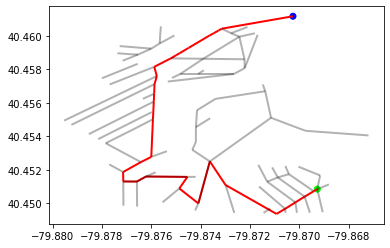

In [ ]:
lc = mc.LineCollection(roads, colors=c, linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.scatter([path[0][0],path[-1][0]],[path[0][1],path[-1][1]],c=[(0,1,0,1),(0,0,1,1)])
ax.autoscale()
#ax.margins(0.1)